# Project - Logistic Regression 

# Abstract:
   The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.The students are classified into three numerical intervals based on their total grade/mark



## Problem Statement:
 Using the dataset we are going to which students are in which class using Logistic  Regression.

## Logistic Regression:
 It is used to analyze relationship between categorical dependent variable and categorical or numerical independent variable.
 It combine the independent varable to estimates the probability that a particular event will occur.

##### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Load the dataset

In [62]:
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [63]:
mydata=df.drop(['NationalITy','PlaceofBirth'],axis = 1)
mydata

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


###### To display the datatype

In [64]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   StageID                   480 non-null    object
 2   GradeID                   480 non-null    object
 3   SectionID                 480 non-null    object
 4   Topic                     480 non-null    object
 5   Semester                  480 non-null    object
 6   Relation                  480 non-null    object
 7   raisedhands               480 non-null    int64 
 8   VisITedResources          480 non-null    int64 
 9   AnnouncementsView         480 non-null    int64 
 10  Discussion                480 non-null    int64 
 11  ParentAnsweringSurvey     480 non-null    object
 12  ParentschoolSatisfaction  480 non-null    object
 13  StudentAbsenceDays        480 non-null    object
 14  Class                     

###### Check the null values

In [65]:
mydata.isnull().sum()

gender                      0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

##### Label Encoder (convert object datatype into int)

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [66]:
mydata["gender"]=LE.fit_transform(mydata.gender)

mydata["StageID"]=LE.fit_transform(mydata.StageID)
mydata["GradeID"]=LE.fit_transform(mydata.GradeID)
mydata["SectionID"]=LE.fit_transform(mydata.SectionID)
mydata["Topic"]=LE.fit_transform(mydata.Topic)
mydata["Semester"]=LE.fit_transform(mydata.Semester)
mydata["Relation"]=LE.fit_transform(mydata.Relation)
mydata["ParentAnsweringSurvey"]=LE.fit_transform(mydata.ParentAnsweringSurvey)
mydata["ParentschoolSatisfaction"]=LE.fit_transform(mydata.ParentschoolSatisfaction)
mydata["StudentAbsenceDays"]=LE.fit_transform(mydata.StudentAbsenceDays)
mydata["Class"]=LE.fit_transform(mydata.Class)

In [67]:
mydata.head(10)

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,2,1,0,7,0,0,40,50,12,50,0,0,0,2
5,0,2,1,0,7,0,0,42,30,13,70,1,0,0,2
6,1,1,4,0,8,0,0,35,12,0,17,0,0,0,1
7,1,1,4,0,8,0,0,50,10,15,22,1,1,1,2
8,0,1,4,0,8,0,0,12,21,16,50,1,1,1,2
9,0,1,4,1,7,0,0,70,80,25,70,1,1,1,2


##### Correlation
To find the relationship between the variables.

#### Visualize:
Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from t

##### Graphs:

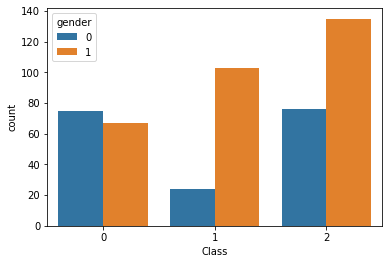

In [68]:
sns.countplot(x="Class",data=mydata,hue="gender")

In [69]:
mydata.gender.value_counts()

1    305
0    175
Name: gender, dtype: int64

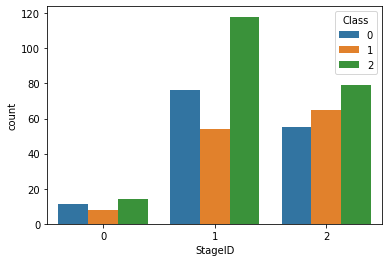

In [72]:
sns.countplot(x='StageID',hue='Class',data=mydata)

In [73]:
mydata.StageID.value_counts()

1    248
2    199
0     33
Name: StageID, dtype: int64

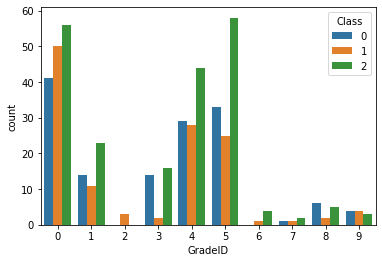

In [74]:
sns.countplot(x='GradeID',hue='Class',data=mydata)

In [75]:
mydata.GradeID.value_counts()

0    147
5    116
4    101
1     48
3     32
8     13
9     11
6      5
7      4
2      3
Name: GradeID, dtype: int64

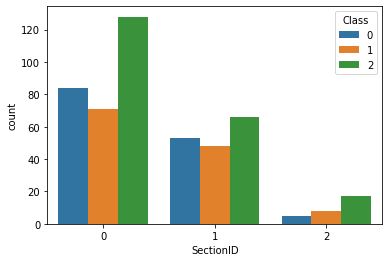

In [76]:
sns.countplot(x='SectionID',hue='Class',data=mydata)

In [77]:
mydata.SectionID.value_counts()

0    283
1    167
2     30
Name: SectionID, dtype: int64

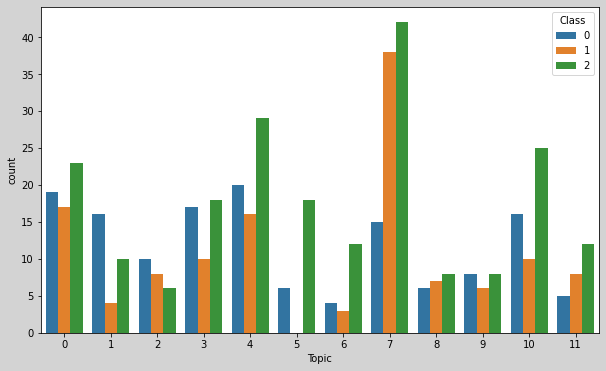

In [78]:
plt.figure(figsize=(10,6),facecolor='lightgrey')
sns.countplot(x='Topic',hue='Class',data=mydata)

In [79]:
mydata.Topic.value_counts()

7     95
4     65
0     59
10    51
3     45
1     30
11    25
5     24
2     24
9     22
8     21
6     19
Name: Topic, dtype: int64

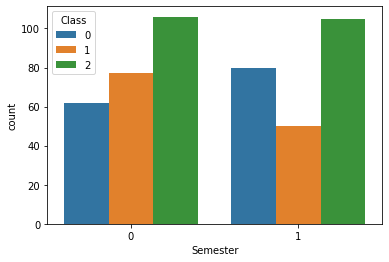

In [80]:
sns.countplot(x='Semester',hue='Class',data=mydata)

In [81]:
mydata.Semester.value_counts()

0    245
1    235
Name: Semester, dtype: int64

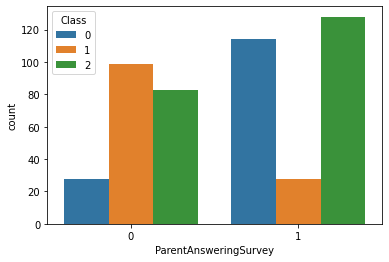

In [82]:
sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=mydata)

In [83]:
mydata.ParentAnsweringSurvey.value_counts()

1    270
0    210
Name: ParentAnsweringSurvey, dtype: int64

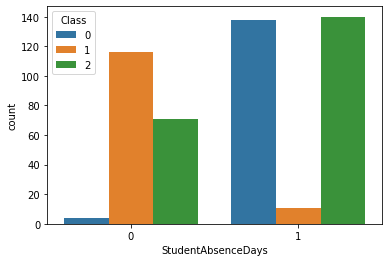

In [84]:
sns.countplot(x='StudentAbsenceDays',hue='Class',data=mydata)

In [85]:
mydata.StudentAbsenceDays.value_counts()

1    289
0    191
Name: StudentAbsenceDays, dtype: int64

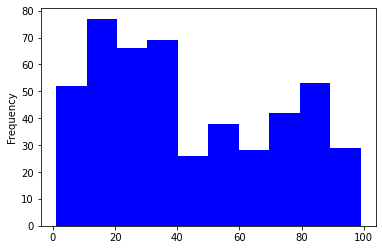

In [86]:
mydata.Discussion.plot.hist(color ='Blue')

Text(0, 0.5, 'VisITedResources')

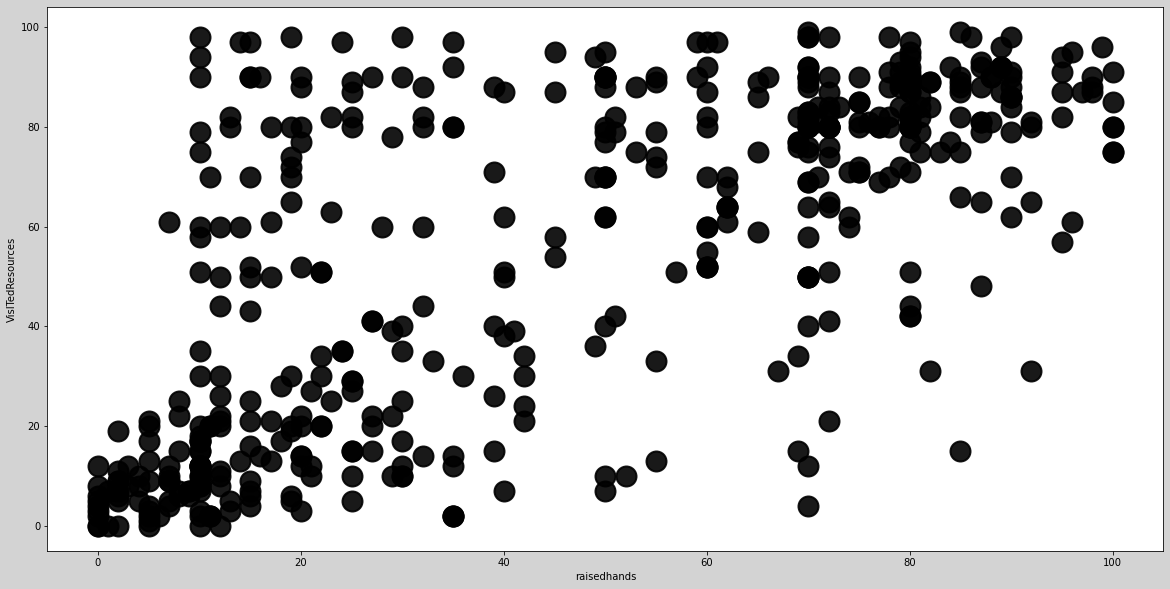

In [117]:
plt.figure(figsize=(20,10),facecolor="lightgrey")
plt.scatter(mydata.raisedhands,mydata.VisITedResources,
           color="black",alpha=0.9,linewidths=2,s=400)
plt.xlabel("raisedhands")
plt.ylabel("VisITedResources")

### Correlation:
Look at some categorical features in relation to each other, to see what insights could be possibly read
To find the relationship between the variables.

In [88]:
mydata_corr= mydata.corr()
mydata_corr

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.017793,0.016869,0.054907,0.031769,0.049156,-0.195142,-0.149978,-0.210932,-0.052139,-0.124703,-0.022359,-0.093478,-0.209011,0.123675
StageID,-0.017793,1.000000,-0.961835,0.296416,-0.047493,-0.029512,0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,-0.112536,-0.011696
GradeID,0.016869,-0.961835,1.000000,-0.303949,0.061389,0.066079,-0.033602,0.182621,0.078262,0.183033,0.168462,0.118246,-0.018421,0.088342,0.013483
SectionID,0.054907,0.296416,-0.303949,1.000000,0.267445,0.046763,0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,0.037062,0.017597
Topic,0.031769,-0.047493,0.061389,0.267445,1.000000,-0.035975,-0.139487,-0.080418,-0.118144,-0.063856,0.054064,0.004730,-0.064087,-0.036537,0.103610
Semester,0.049156,-0.029512,0.066079,0.046763,-0.035975,1.000000,0.148705,0.178358,0.173219,0.287066,0.019083,0.023628,-0.025258,0.072462,-0.043287
Relation,-0.195142,0.034205,-0.033602,0.005783,-0.139487,0.148705,1.000000,0.364237,0.360240,0.339505,0.026720,0.163811,0.287698,0.219687,-0.272111
raisedhands,-0.149978,-0.172751,0.182621,-0.143862,-0.080418,0.178358,0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,0.463882,-0.231016
VisITedResources,-0.210932,-0.068621,0.078262,-0.080909,-0.118144,0.173219,0.360240,0.691572,1.000000,0.594500,0.243292,0.382472,0.363835,0.499030,-0.161748
AnnouncementsView,-0.052139,-0.163666,0.183033,-0.144955,-0.063856,0.287066,0.339505,0.643918,0.594500,1.000000,0.417290,0.396357,0.298744,0.312134,-0.143996


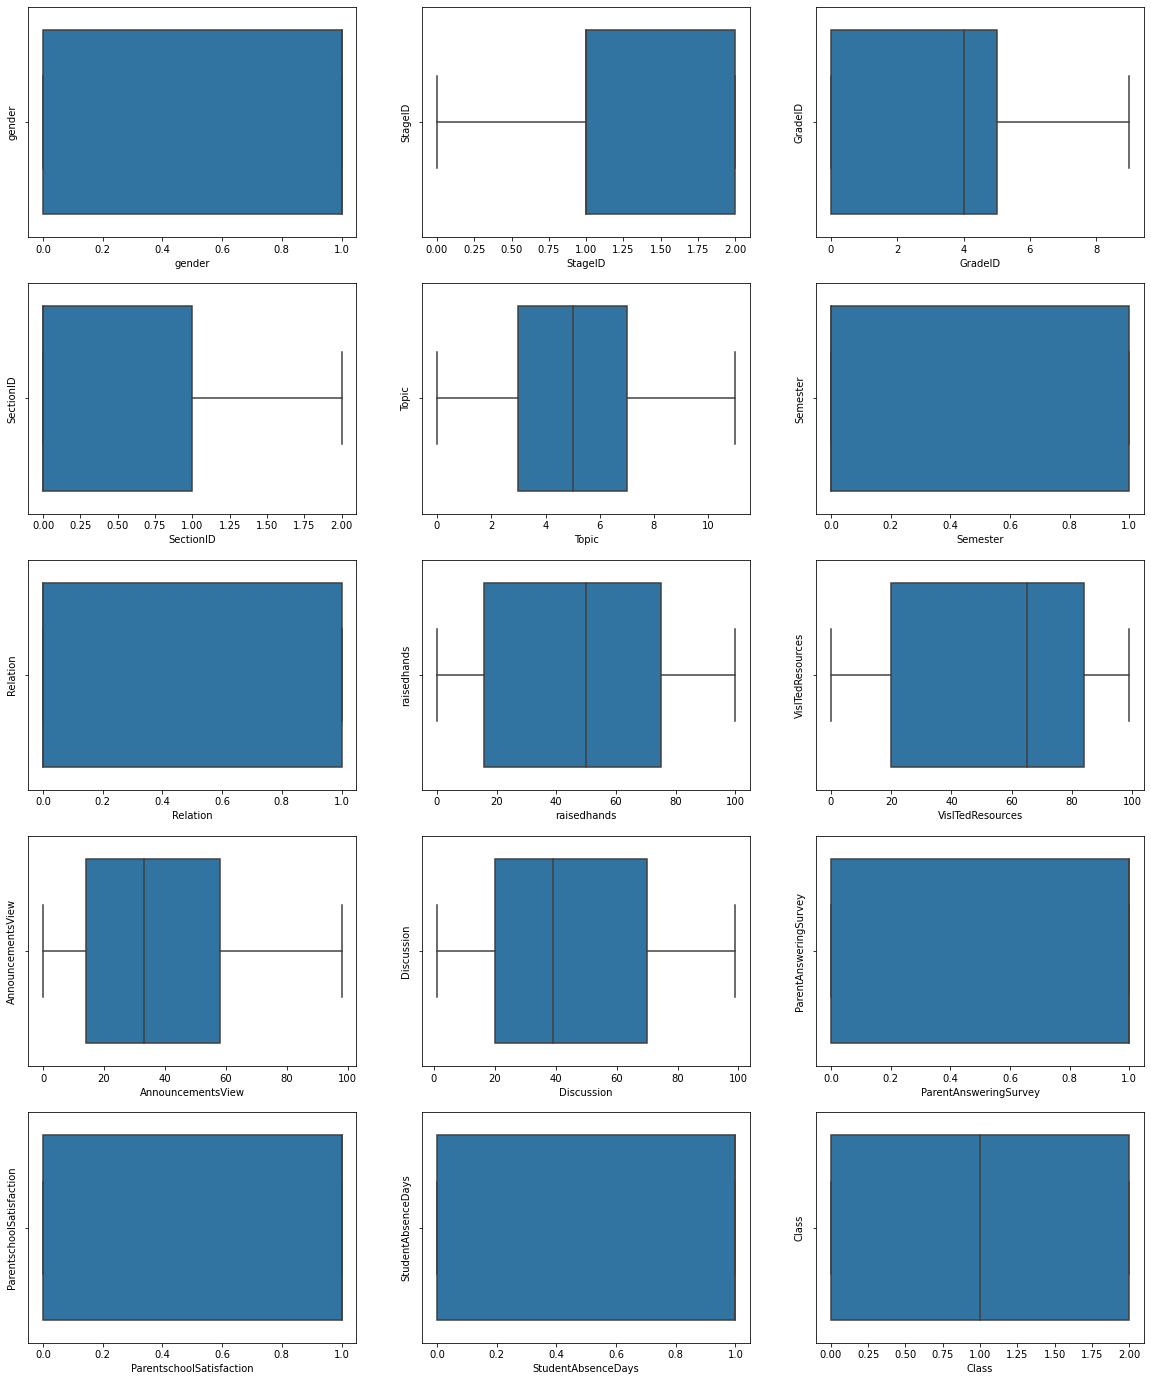

In [89]:
plt.figure(figsize=(20,50))
for i,col in enumerate(mydata,1):
    plt.subplot(10,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

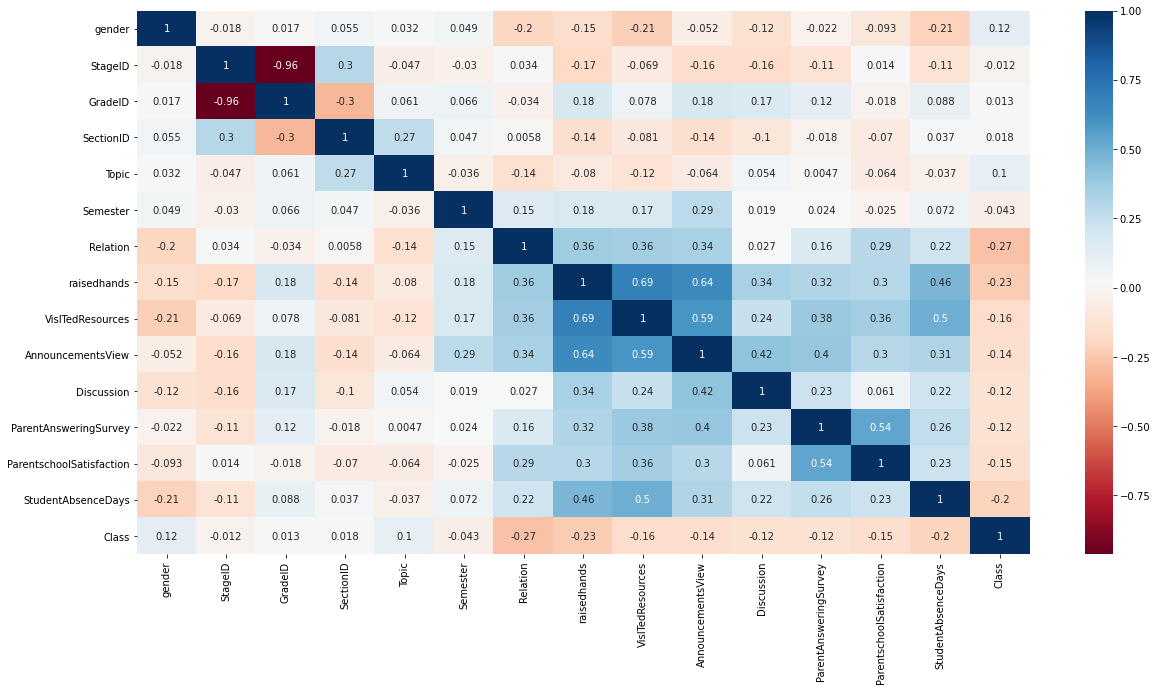

In [90]:
plt.figure(figsize = (20,10))
sns.heatmap(mydata_corr, annot= True, cmap = 'RdBu')

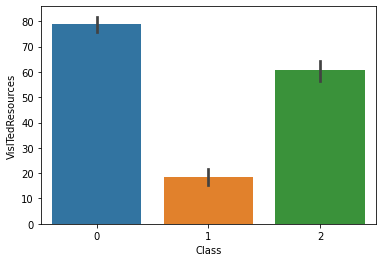

In [91]:
sns.barplot(x="Class",y='VisITedResources',data=mydata);

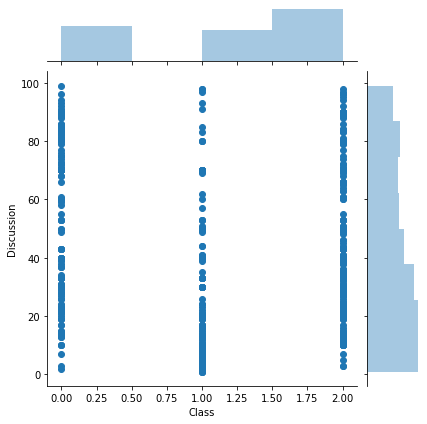

In [92]:
sns.jointplot(x="Class",y='Discussion',data=mydata)

##### Separate independent and dependent variables:

###### dependent variables

In [96]:
y_dep=mydata.iloc[:,14]   # the dependent variable is cateriozed into 3                      
y_dep

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64

###### Independent variable:

In [97]:
x_ind = mydata.iloc[:,0:16]
x_ind

,gender,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,1,5,0,6,0,0,30,17,14,57,0,0,0,1


#### Machine Learning

##### Train and test split

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,train_size = 0.8, random_state = 86)


### Build classification model and present it's classification report

##### Logistic regression model

In [100]:
# The class is cateroize into 3 we can use multinomial in logistic regression.
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(multi_class ='multinomial', solver ='lbfgs')
model1


LogisticRegression(multi_class='multinomial')

##### Model fitting:

In [101]:
model1.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

#### Predict the x_test

In [102]:
y_pred=model1.predict(x_test)
y_pred

array([1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 2, 1, 0])

###### Performance measures:

#### Confusion matrix:
   It is used to calculate the follwoing performance measures like accuracy,f1 score,precision,recall

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [104]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[31,  0,  0],
       [ 0, 28,  0],
       [ 0,  0, 37]])

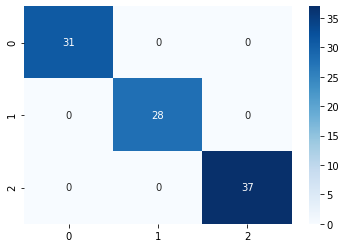

In [105]:
sns.heatmap(con_matrix, annot = True ,cmap = "Blues")

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
norm=StandardScaler()

In [108]:
x_train_norm=norm.fit_transform(x_train)
x_test_norm=norm.fit_transform(x_test)


In [109]:
y_pred_norm =model1.predict(x_test_norm)
y_pred_norm

array([1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 1, 0])

In [110]:
con_matrix = confusion_matrix(y_test,y_pred_norm)
con_matrix

array([[30,  1,  0],
       [ 2, 25,  1],
       [ 0,  3, 34]])

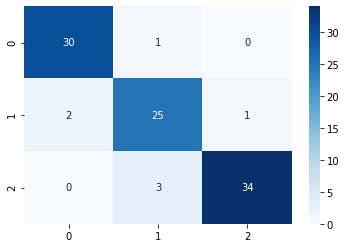

In [111]:
sns.heatmap(con_matrix, annot = True ,cmap = "Blues")

In [112]:
accuracy_score(y_test,y_pred) 

1.0

#### Accuracy score:
   My model accuracy for this data set is *100%*.The predicted values are equal to actual values.

#### Classification report:

In [113]:
from sklearn.metrics import classification_report

In [114]:
class_report = classification_report(y_test,y_pred)

In [115]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        37

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



# Conclusion:
   The overall accuracy for this dataset is **100%**. As our target variable is categorized into 3 classes. We used to multiclass logistic regression. 100 % of system provides users with a synchronous access to educational resources from any device with Internet connection.